In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [4]:
file_path = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\SRS_Thesis_ShareFolder\_DATA\_AOIs\_CORNUDAS\_FIELD SPEC\Rock_Type_March2024\Igneous_Plotted_Data.csv'


df = pd.read_csv(file_path, delimiter=',')

df.head()

,Wavelength (nm),Average Reflectance,Field_ID
0,350.0,0.2823,CND005
1,351.0,0.2839,CND005
2,352.0,0.2806,CND005
3,353.0,0.2786,CND005
4,354.0,0.2786,CND005


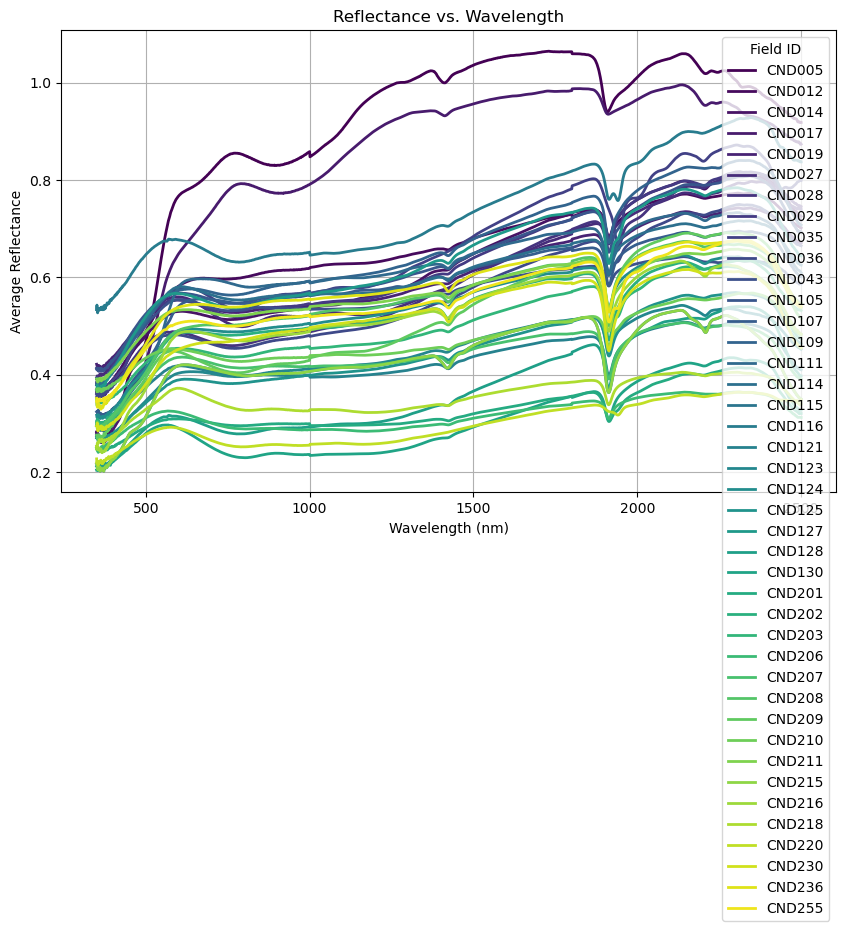

In [5]:
color_map = {}
for i, field_id in enumerate(df['Field_ID'].unique()):
    color_map[field_id] = plt.cm.viridis(i / len(df['Field_ID'].unique()))

# Plot the data
plt.figure(figsize=(10, 6))

for field_id, group in df.groupby('Field_ID'):
    plt.plot(group['Wavelength (nm)'], group['Average Reflectance'], linestyle='-', linewidth = '2', label=field_id, color=color_map[field_id])

plt.title('Reflectance vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Reflectance')
plt.legend(title='Field ID')
plt.grid(True)
plt.show()

In [6]:
# Function to calculate numerical derivative
def numerical_derivative(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    return dy / dx

# Create a new DataFrame to store the derivative data
derivative_df = pd.DataFrame(columns=['Wavelength (nm)', 'Derivative', 'Field_ID'])

# Calculate the derivative for each 'Field_ID' and add to the new DataFrame
for field_id, group in df.groupby('Field_ID'):
    derivative_values = numerical_derivative(group['Wavelength (nm)'], group['Average Reflectance'])
    temp_df = pd.DataFrame({'Wavelength (nm)': group['Wavelength (nm)'], 'Derivative': derivative_values, 'Field_ID': field_id})
    derivative_df = pd.concat([derivative_df, temp_df], ignore_index=True)

print("New DataFrame with Derivative Data:")
print(derivative_df)

New DataFrame with Derivative Data:
       Wavelength (nm)  Derivative Field_ID
0                350.0    0.001600   CND005
1                351.0   -0.000850   CND005
2                352.0   -0.002650   CND005
3                353.0   -0.001000   CND005
4                354.0   -0.000100   CND005
...                ...         ...      ...
88186           2496.0   -0.000065   CND255
88187           2497.0    0.000031   CND255
88188           2498.0    0.000038   CND255
88189           2499.0   -0.000167   CND255
88190           2500.0   -0.000489   CND255

[88191 rows x 3 columns]


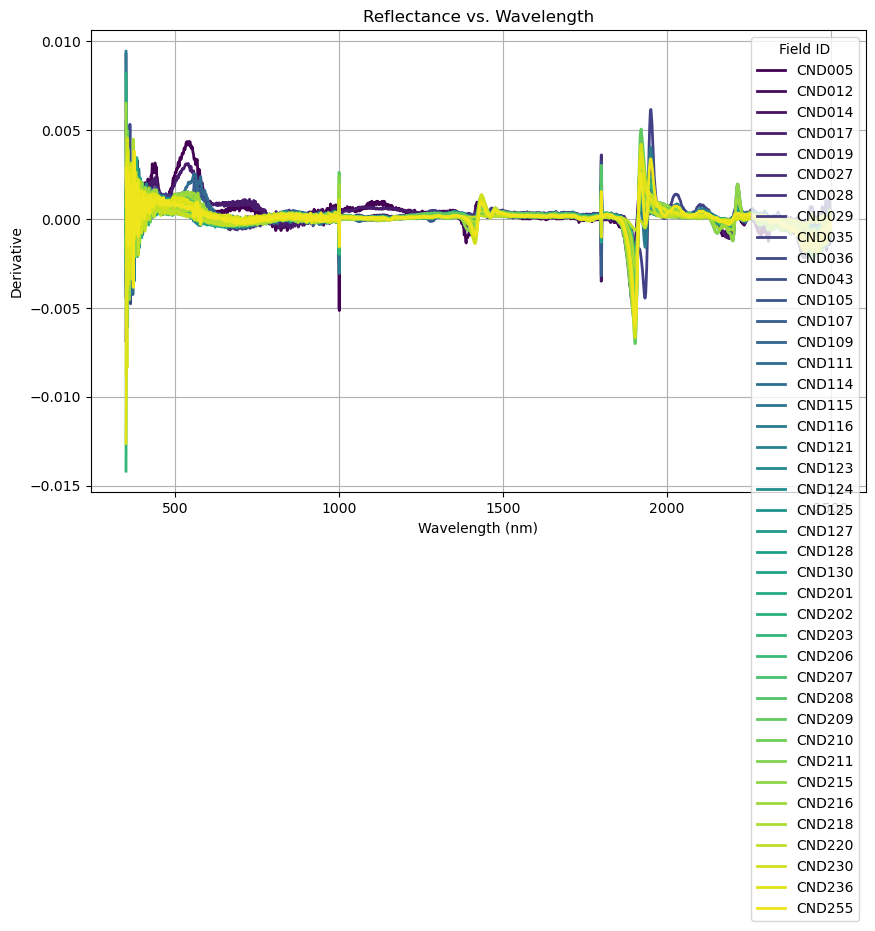

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))

for field_id, group in derivative_df.groupby('Field_ID'):
    plt.plot(group['Wavelength (nm)'], group['Derivative'], linestyle='-', linewidth = '2', label=field_id, color=color_map[field_id])

plt.title('Reflectance vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Derivative')
plt.legend(title='Field ID')
plt.grid(True)
plt.show()

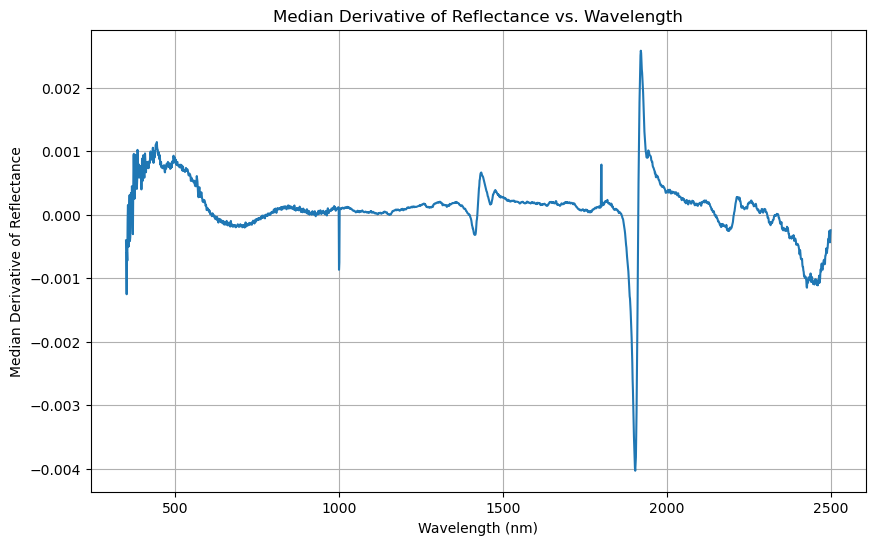

In [8]:
# Remove 'Field_ID' column before calculating median derivative
derivative_df_numeric = derivative_df.drop(columns=['Field_ID'])

# Group by 'Wavelength (nm)' and calculate the median derivative
median_derivative_df = derivative_df_numeric.groupby('Wavelength (nm)').median().reset_index()

# Plot the median derivative data
plt.figure(figsize=(10, 6))
plt.plot(median_derivative_df['Wavelength (nm)'], median_derivative_df['Derivative'], linestyle='-')

plt.title('Median Derivative of Reflectance vs. Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Median Derivative of Reflectance')
plt.grid(True)
plt.show()

In [9]:
derivative_df.to_csv(r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\SRS_Thesis_ShareFolder\_DATA\_AOIs\_CORNUDAS\_FIELD SPEC\Rock_Type_March2024\Igneous_Derivative.csv', index=False)